# **Loan Prediction Based on Customer Behavior**


## Dataset Description

There are 12 variables in the Datasets

All values were provided at the time of the loan application.
<center>

| Column             | Description                                       | Type  |
|--------------------|---------------------------------------------------|-------|
| income             | Income of the user                                | int   |
| age                | Age of the user                                   | int   |
| experience         | Professional experience of the user in years      | int   |
| profession         | Profession                                        | string|
| married            | Whether married or single                         | string|
| house_ownership    | Owned or rented or neither                        | string|
| car_ownership      | Does the person own a car                         | string|
| risk_flag          | Defaulted on a loan                               | string|
| currentjobyears    | Years of experience in the current job            | int   |
| currenthouseyears  | Number of years in the current residence          | int   |
| city               | City of residence                                 | string|
| state              | State of residence                                | string|

</center>
The risk_flag indicates whether there has been a default in the past or not. All values were provided at the time of the loan application.


## Table of Contents
1. [Import Libraries](#import-libraries)
2. [Reading Dataset](#reading-dataset)
3. [Data Cleaning](#data-cleaning)
4. [Data Analysis](#data-analysis)
5. [Data Preprocessing](#data-preprocessing)
6. [Modeling and Evaluation](#modeling-and-evaluation)

<a id='import-libraries'></a>
## 1 - Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sb
import random
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import product
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss
from fanalysis.pca import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<a id='reading-dataset'></a>
## 2 - Reading Dataset

In [2]:
df = pd.read_csv('./LoanDataset.csv',index_col=0)

### 2.1 - Checking our Dataset

In [3]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
# getting info about our variables  
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [5]:
# unique values in each category 
df.nunique()

Income               41920
Age                     59
Experience              21
Married/Single           2
House_Ownership          3
Car_Ownership            2
Profession              51
CITY                   317
STATE                   29
CURRENT_JOB_YRS         15
CURRENT_HOUSE_YRS        5
Risk_Flag                2
dtype: int64

In [6]:
# checking how many NaN values we have 
df.isna().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

**We have no missing values which is good**

In [7]:
# values of the column city 
df['CITY'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [8]:
# values of the state city 
df['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

We can see some weird state and city names that will need to be cleaned

In [9]:
# values of the column profession 
df['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [10]:
# values of the column house_ownership
df['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

<a id='data-cleaning'></a>
## 3 - Data Cleaning

In [11]:
# making all our column names lowercase so that they're easier to manipulate 
df.columns = df.columns.str.lower()

In [12]:
# cleaning state and city 
df['city'] = df['city'].str.extract("([A-Za-z]+)")
df['state'] = df['state'].str.extract("([A-Za-z]+)")

In [13]:
# renaming our column married/single to relationship_status 
df.rename(columns={'married/single' : 'relationship_status'},inplace=True)

<a id='data-analysis'></a>
## 4 - Data Analysis

### 4.1 - Univariate Data Analysis

#### Categorial data

##### Summary Table

In [14]:
# summary table for each column 
for col in df.select_dtypes(include=['object']).columns:
    print(f"Summary for {col}:")
    print(df[col].value_counts())
    print("-------------------------")

Summary for relationship_status:
relationship_status
single     226272
married     25728
Name: count, dtype: int64
-------------------------
Summary for house_ownership:
house_ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64
-------------------------
Summary for car_ownership:
car_ownership
no     176000
yes     76000
Name: count, dtype: int64
-------------------------
Summary for profession:
profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_An

##### Bar Chart

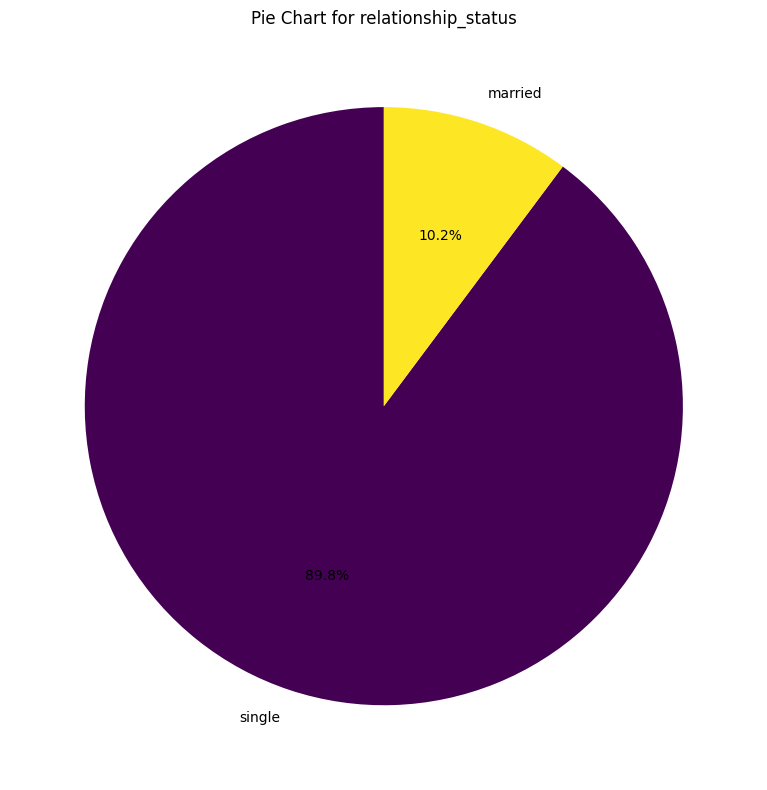

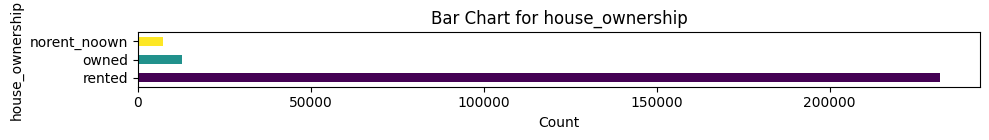

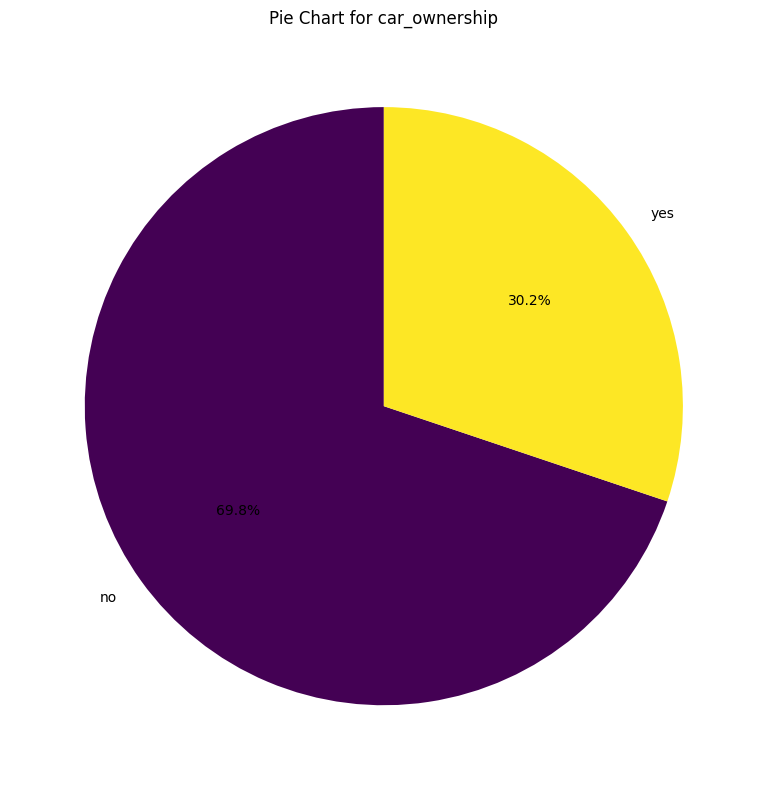

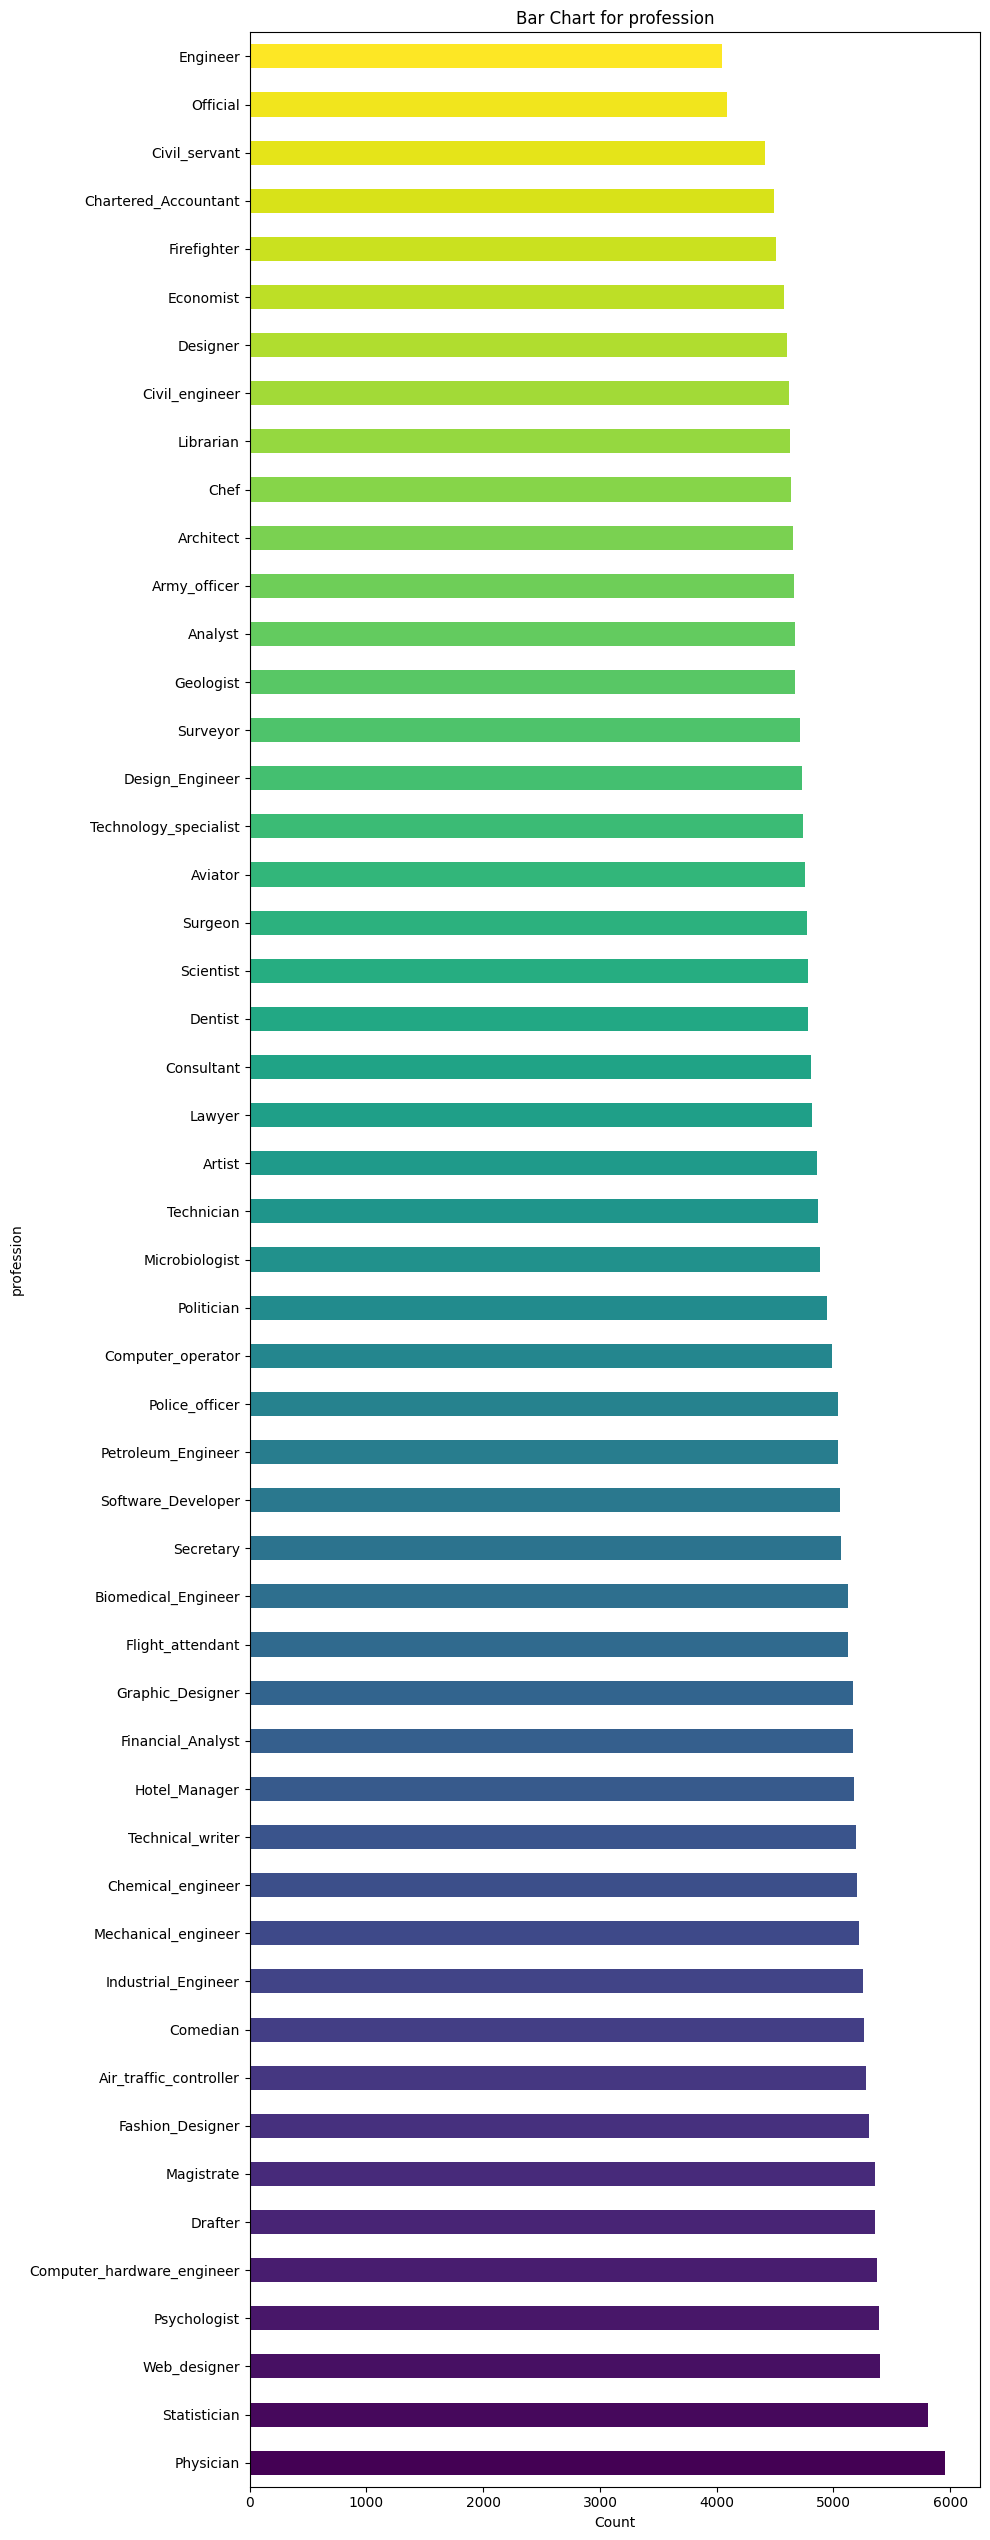

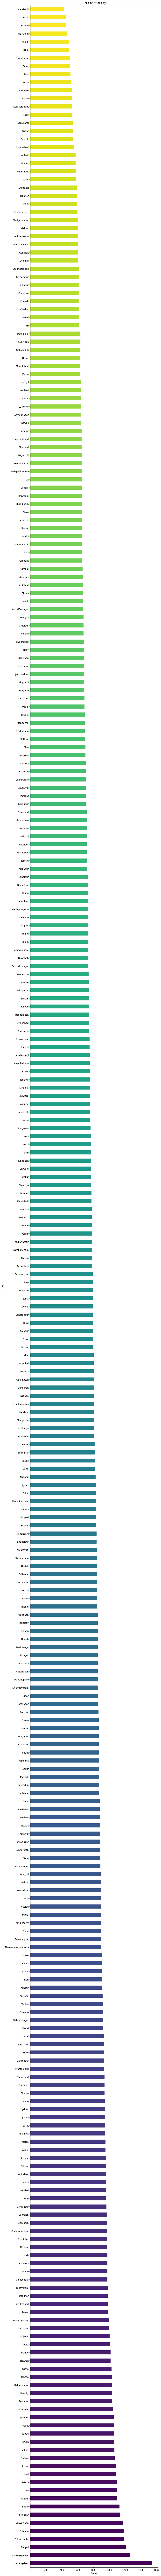

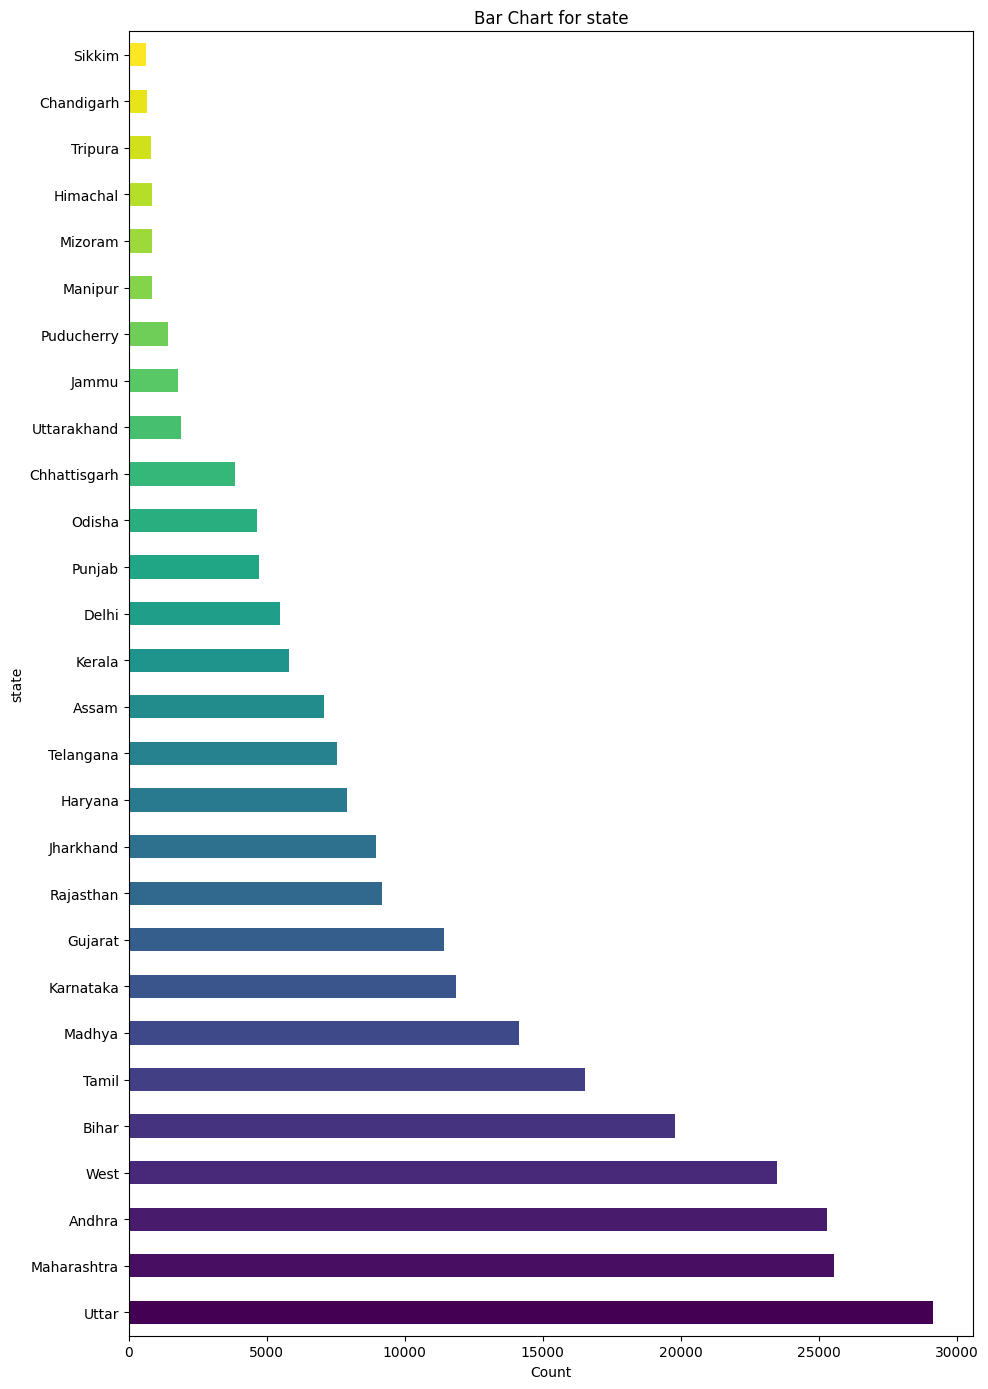

In [15]:
# bar chart for each categorical Variable 
for col in df.select_dtypes(include=['object']).columns:
    # calculate unique values to determine figure height
    n_unique = df[col].nunique()
    if n_unique == 2:
        # pie chart for binary columns 
        plt.figure(figsize=(8, 8))
        df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
        plt.title(f"Pie Chart for {col}")
        # remove the column name from the y-axis 
        plt.ylabel('') 
        plt.tight_layout()
        plt.show()
        continue
    colors = plt.cm.viridis(np.linspace(0, 1, n_unique))
    
    plt.figure(figsize=(10, n_unique * 0.5))  
    counts = df[col].value_counts()
    
    counts.plot.barh(color=colors)
    
    plt.title(f"Bar Chart for {col}")
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()

### Quantitative Data

##### Plotting Histograms

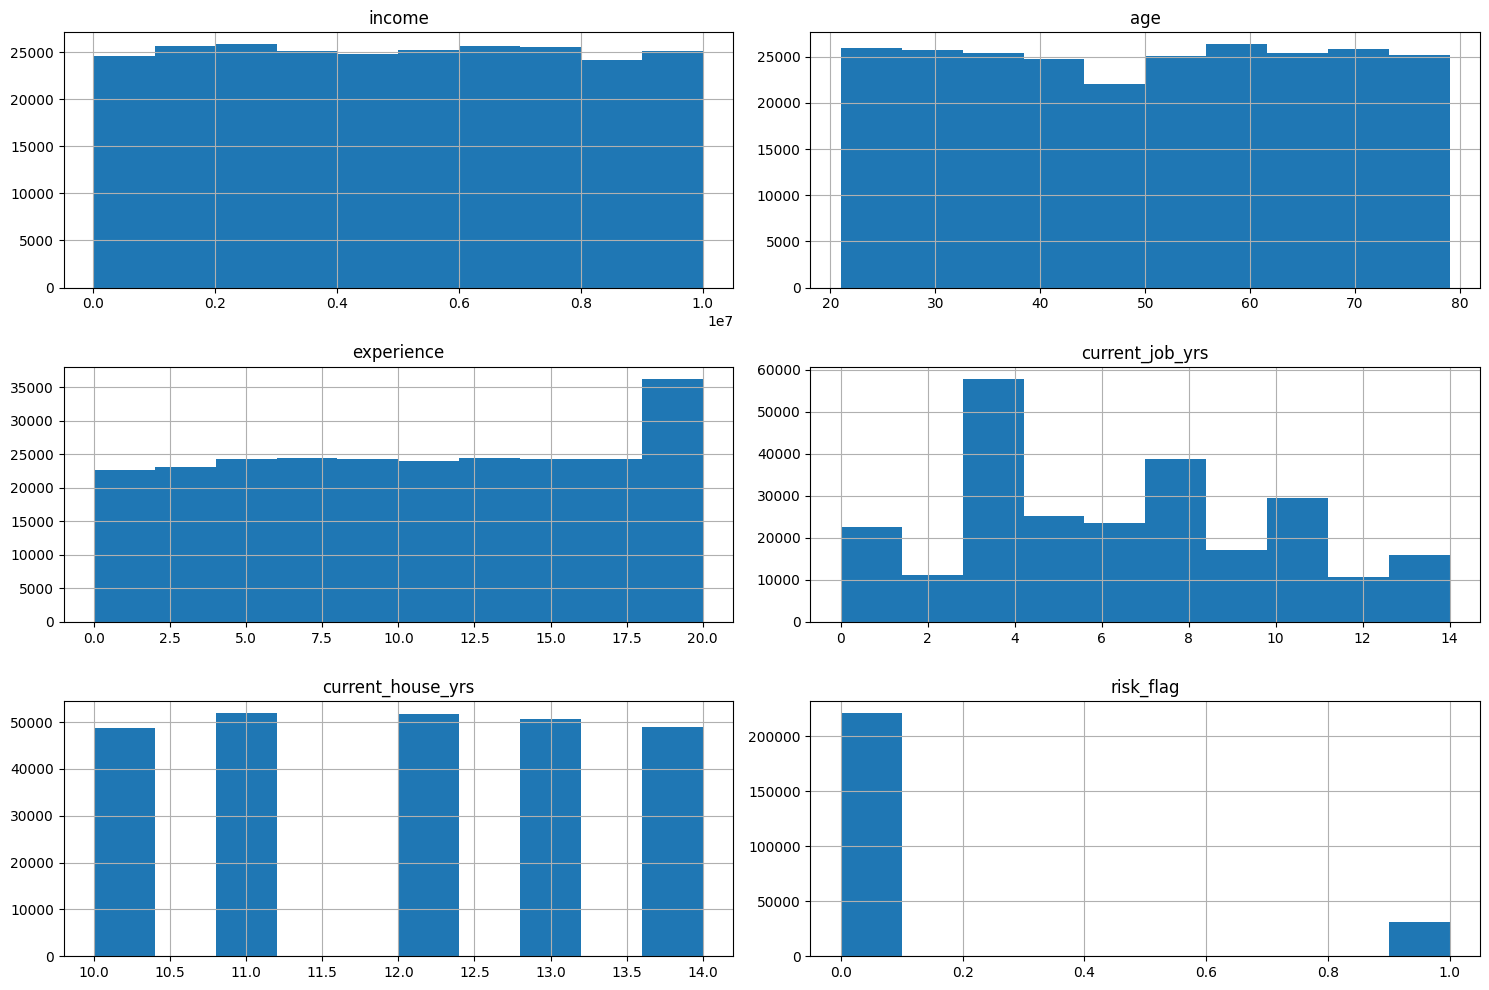

In [16]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

##### Let's look more into risk_flag

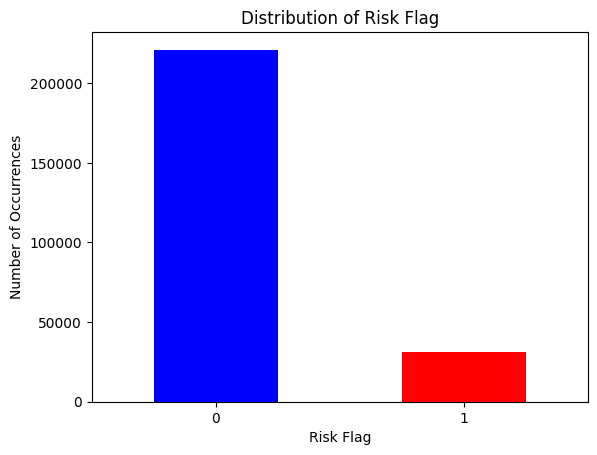

In [17]:
risk_distribution = df['risk_flag'].value_counts()

# plotting distribution of Risk Flag 
risk_distribution.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Risk Flag')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Risk Flag')
plt.xticks(rotation=0)
plt.show()

**We can clearly see that there is a very important class imbalance between the 2 classes. We'll use SMOTE (Synthetic Minority Over-sampling Technique) later on to make them equally distributed for better results during the modeling part.**

##### Plotting BoxPlot

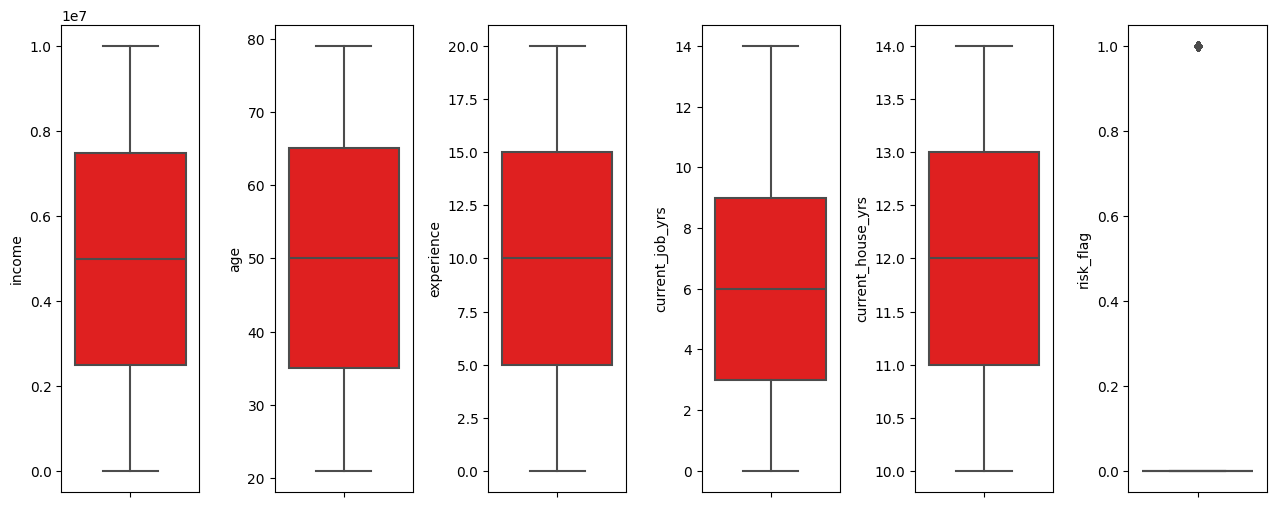

In [18]:
## Plotting BoxPlot of each quantitative variable ##

plt.figure(figsize=(15,10))

for index,col in enumerate(df.select_dtypes(include=['int64','float64']).columns,1):
    plt.subplot(2, len(df.columns) // 2 + 1, index)

    sb.boxplot(y=col, data=df, color = 'red')
    plt.tight_layout()

plt.show()

### 4.2 - Bivariate Data Analysis


##### Contingency table, Chi-square and Cramer's V

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   income               252000 non-null  int64 
 1   age                  252000 non-null  int64 
 2   experience           252000 non-null  int64 
 3   relationship_status  252000 non-null  object
 4   house_ownership      252000 non-null  object
 5   car_ownership        252000 non-null  object
 6   profession           252000 non-null  object
 7   city                 252000 non-null  object
 8   state                252000 non-null  object
 9   current_job_yrs      252000 non-null  int64 
 10  current_house_yrs    252000 non-null  int64 
 11  risk_flag            252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [20]:
from itertools import combinations
from scipy.stats import chi2_contingency

# Select all the categorical columns #
categorical_columns = df.select_dtypes(include=['object','category']).columns

# use combinations to iterate through 2 columns at once and print their contingency tables 
for col1, col2 in combinations(categorical_columns, 2):  
    print(f"Contingency table for {col1} and {col2}:\n")
    contingency = pd.crosstab(df[col1], df[col2])
    print(contingency)

    # Chi-square test
    chi2, p, _, _ = chi2_contingency(contingency)
    print("\nChi-square Statistic:", chi2)
    print("P-value:", p)

    # Cramer's V
    n = contingency.sum().sum()
    min_dim = min(contingency.shape) - 1
    v = (chi2 / (n * min_dim))**0.5
    print("\nCramer's V:", v)

    print("\n" + "-"*50 + "\n")

Contingency table for relationship_status and house_ownership:

house_ownership      norent_noown  owned  rented
relationship_status                             
married                       595    923   24210
single                       6589  11995  207688

Chi-square Statistic: 174.869089039534
P-value: 1.0657609105047439e-38

Cramer's V: 0.026342455400096765

--------------------------------------------------

Contingency table for relationship_status and car_ownership:

car_ownership            no    yes
relationship_status               
married               18011   7717
single               157989  68283

Chi-square Statistic: 0.3580171005169928
P-value: 0.5496095547211083

Cramer's V: 0.0011919323721710626

--------------------------------------------------

Contingency table for relationship_status and profession:

profession           Air_traffic_controller  Analyst  Architect  Army_officer  \
relationship_status                                                             


##### Correlation Table

In [21]:
corr_matrix = df.select_dtypes('int','float').corr()
corr_matrix

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
income,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
age,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
experience,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
current_job_yrs,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
current_house_yrs,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
risk_flag,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


In [ ]:
plt.figure(figsize=(7,5))

sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

##### Correlation test and r values

In [22]:
quantitative_columns = df.select_dtypes('int','float').columns
# test the significance of the correlation 
for col1, col2 in combinations(quantitative_columns, 2):
    r, p = pearsonr(df[col1], df[col2])
    print(f"Pearson correlation between {col1} and {col2}:")
    print(f"r = {r:.4f}, p-value = {p:.4f}")
    print("\n" + "-"*50 + "\n")

Pearson correlation between income and age:
r = -0.0007, p-value = 0.7435

--------------------------------------------------

Pearson correlation between income and experience:
r = 0.0064, p-value = 0.0013

--------------------------------------------------

Pearson correlation between income and current_job_yrs:
r = 0.0070, p-value = 0.0004

--------------------------------------------------

Pearson correlation between income and current_house_yrs:
r = -0.0024, p-value = 0.2288

--------------------------------------------------

Pearson correlation between income and risk_flag:
r = -0.0031, p-value = 0.1207

--------------------------------------------------

Pearson correlation between age and experience:
r = -0.0011, p-value = 0.5747

--------------------------------------------------

Pearson correlation between age and current_job_yrs:
r = 0.0022, p-value = 0.2795

--------------------------------------------------

Pearson correlation between age and current_house_yrs:
r = -0.

##### Scatter Plot Matrix

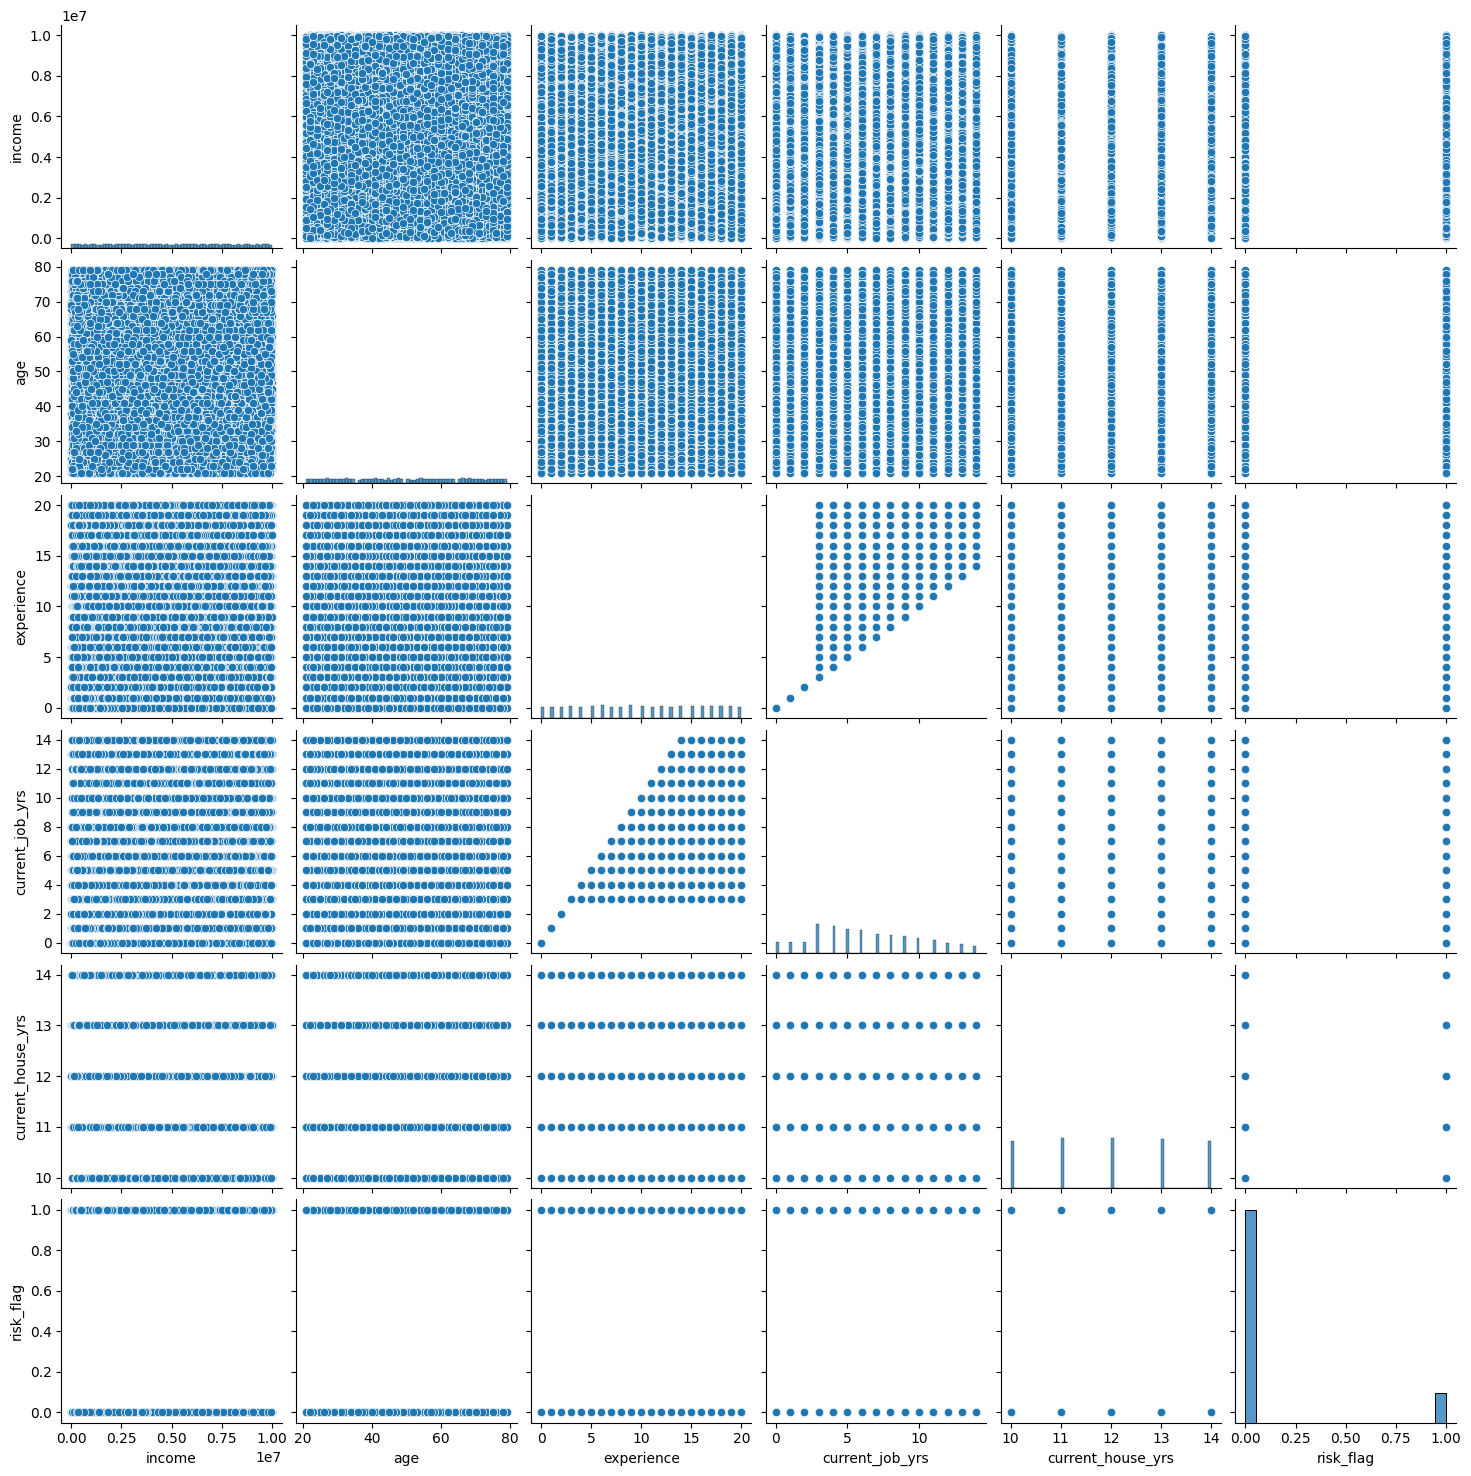

In [23]:
sb.pairplot(df.select_dtypes(include=['int','float']))
plt.show()

##### Anova Table

In [24]:
quantitative_columns = df.select_dtypes(include=['float64', 'int64']).columns
qualitative_columns = df.select_dtypes(include=['object', 'category']).columns

# use product to iterate over all pairs of quantitative and qualitative columns 
for q_col, qual_col in product(quantitative_columns, qualitative_columns):
        
    ## construct the formula for the OLS model 
    formula = f"{q_col} ~ C({qual_col})"
    
    ## fit the OLS model 
    model = ols(formula, data=df).fit()
    
    # get the ANOVA table
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # print the ANOVA table 
    print(f"ANOVA table for {q_col} by {qual_col}:\n")
    print(anova_table)
    print("\n" + "-"*65 + "\n")

ANOVA table for income by relationship_status:

                              sum_sq        df         F    PR(>F)
C(relationship_status)  1.501984e+13       1.0  1.812973  0.178153
Residual                2.087715e+18  251998.0       NaN       NaN

-----------------------------------------------------------------

ANOVA table for income by house_ownership:

                          sum_sq        df          F        PR(>F)
C(house_ownership)  8.204258e+14       2.0  49.533739  3.104545e-22
Residual            2.086909e+18  251997.0        NaN           NaN

-----------------------------------------------------------------

ANOVA table for income by car_ownership:

                        sum_sq        df         F   PR(>F)
C(car_ownership)  3.454915e+13       1.0  4.170301  0.04114
Residual          2.087695e+18  251998.0       NaN      NaN

-----------------------------------------------------------------

ANOVA table for income by profession:

                     sum_sq        df 

<a id='data-preprocessing'></a>
## 5 - Data Preprocessing

##### ColumnTransformer

In [25]:
numeric_features = df.select_dtypes(exclude=['object','category']).columns.tolist()

if 'risk_flag' in numeric_features:
    numeric_features.remove('risk_flag')

preprocessor = ColumnTransformer([
    ('standard scaling',StandardScaler(),numeric_features)
])

In [26]:
# label encoding all our categorical variables
lb = LabelEncoder()
categorical_features_lb = df.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_features_lb:
    df[col]= lb.fit_transform(df[col])

In [27]:
df.head()

,income,age,experience,relationship_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
Id,,,,,,,,,,,,
1,1303834,23,3,1,2,0,33,250,13,3,13,0
2,7574516,40,10,1,2,0,43,226,14,9,13,0
3,3991815,66,4,0,2,0,47,8,12,4,10,0
4,6256451,41,2,1,2,1,43,53,17,2,12,1
5,5768871,47,11,1,2,0,11,295,22,3,14,1


In [28]:
## our features/predictors ##
X = df.drop('risk_flag', axis=1)
## our outcome ##
y = df['risk_flag']

In [29]:
# standard scaler on our quantitative variables 
X = preprocessor.fit_transform(X)

##### SMOTE

In [30]:
# instantiate and apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

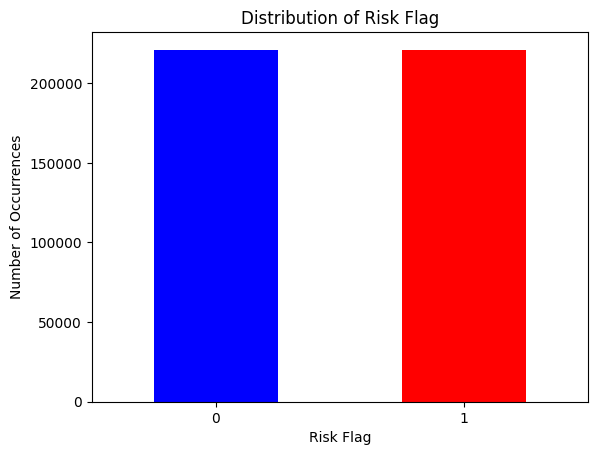

In [31]:
risk_distribution = y_resampled.value_counts()

# plotting distribution of Risk Flag 
risk_distribution.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Risk Flag')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Risk Flag')
plt.xticks(rotation=0)
plt.show()

**We can clearly see now that the 2 classes of Risk Flag are equally distributed**

<a id='modeling-and-evaluation'></a>
## 6 - Modeling and Evaluation

Please note, ROC AUC should be calculated as well

##### Splitting our data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(176400, 5)
(75600, 5)
(176400,)
(75600,)


#### K-nearest Neighbors Classifier

**Let's use Gridsearch to find the best parameters for knn**

In [34]:
## Paramater Grid ##
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

## using 5-fold cross-validation ##
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 29, 'weights': 'distance'}
Best cross-validation score: 0.90


**Let's now test our best parameters on our test set**

In [35]:
knn_best_param= KNeighborsClassifier(**grid_search.best_params_)

In [36]:
knn_best_param.fit(X_train_resampled,y_train_resampled)
y_pred = knn_best_param.predict(X_test)

In [37]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     66301
           1       0.50      0.74      0.59      9299

    accuracy                           0.88     75600
   macro avg       0.73      0.82      0.76     75600
weighted avg       0.90      0.88      0.89     75600



#### Logistic Regression

In [38]:
## Parameter Grid ##
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # l1 is Lasso, l2 is Ridge
    'solver': ['liblinear', 'saga']  # solvers that can handle both l1 and l2
}

logreg = LogisticRegression(max_iter=10000)

## using 5-fold cross-validation ##
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.52


In [39]:
logreg_best_param = LogisticRegression(max_iter=10000, C=0.01,penalty='l1',solver='saga')

In [40]:
logreg_best_param.fit(X_train_resampled,y_train_resampled)
y_pred = logreg_best_param.predict(X_test)

In [41]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.50      0.64     66301
           1       0.13      0.54      0.21      9299

    accuracy                           0.50     75600
   macro avg       0.51      0.52      0.42     75600
weighted avg       0.79      0.50      0.58     75600



#### Random Forest

In [42]:
# parameter grid 

param_grid = {
    'n_estimators': [50, 100],  # Reduced number of options
    'max_depth': [None, 20],    # Simplified choices
    'min_samples_split': [2, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 4], # Minimum number of samples required at each leaf node
    'bootstrap': [True, False],# Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

rf = RandomForestClassifier(random_state=42)

## using 3-fold cross-validation ##
random_search = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

Best parameters found:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}
Best cross-validation score: 0.93


In [43]:
rf_best_param = RandomForestClassifier(**random_search.best_params_)

In [45]:
rf_best_param.fit(X_train_resampled,y_train_resampled)
y_pred = rf_best_param.predict(X_test)

In [46]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     66301
           1       0.53      0.79      0.63      9299

    accuracy                           0.89     75600
   macro avg       0.75      0.84      0.78     75600
weighted avg       0.91      0.89      0.90     75600



### Elastic net logistic regression


In [47]:
# parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],    # Inverse of regularization strength; smaller values specify stronger regularization.
    'l1_ratio': [0, 0.5, 1],                # Mix ratio between Lasso (l1) and Ridge (l2). 0 for Ridge, 1 for Lasso, values in (0,1) for a mix.
    'solver': ['saga'],                     # 'saga' solver supports the elastic net penalty.
}

# Elastic Net Logistic Regression instance
log_reg_elastic = LogisticRegression(max_iter = 10000, penalty='elasticnet', random_state=42)

## using 3-fold cross-validation ##
random_search = RandomizedSearchCV(log_reg_elastic, param_grid, n_iter=10, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))


Best parameters found:  {'solver': 'saga', 'l1_ratio': 1, 'C': 1}
Best cross-validation score: 0.52


Best parameters found:  {'solver': 'saga', 'max_iter': 1000, 'l1_ratio': 0.5, 'C': 100}

In [48]:
logreg_elastic_best_param = LogisticRegression(penalty='elasticnet',**random_search.best_params_)


In [49]:
logreg_elastic_best_param.fit(X_train_resampled,y_train_resampled)
y_pred = logreg_elastic_best_param.predict(X_test)

In [50]:
print("Elastic net logistic regression Report:")
print(classification_report(y_test, y_pred))

Elastic net logistic regression Report:
              precision    recall  f1-score   support

           0       0.89      0.50      0.64     66301
           1       0.13      0.55      0.21      9299

    accuracy                           0.50     75600
   macro avg       0.51      0.52      0.42     75600
weighted avg       0.79      0.50      0.58     75600



### XGBOOST

In [51]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# parameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.3],  # Step size shrinkage used to prevent overfitting.
    'max_depth': [3, 4, 5, 6, 7, 8, 10],      # Maximum depth of a tree.
    'n_estimators': [50, 100, 150, 200],      # Number of boosting rounds.
    'subsample': [0.5, 0.7, 0.9, 1.0],        # Proportion of training data to randomly sample in each boosting round.
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0], # Proportion of features to randomly sample for building each tree.
    'gamma': [0, 0.25, 0.5, 1.0],             # Regularization on leaf nodes.
    'reg_alpha': [0, 0.1, 0.5, 1],            # L1 regularization term on weights.
    'reg_lambda': [1, 1.5, 2, 3, 4.5]         # L2 regularization term on weights.
}

# XGBoost instance
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')

## using 3-fold cross-validation ##
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))


Best parameters found:  {'subsample': 0.5, 'reg_lambda': 3, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 1.0}
Best cross-validation score: 0.91


In [52]:
xgb_best_param = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss',**random_search.best_params_)

In [53]:
xgb_best_param.fit(X_train_resampled,y_train_resampled)
y_pred = xgb_best_param.predict(X_test)

In [54]:
print("XGBOOST Report:")
print(classification_report(y_test, y_pred))

XGBOOST Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     66301
           1       0.51      0.78      0.62      9299

    accuracy                           0.88     75600
   macro avg       0.74      0.84      0.77     75600
weighted avg       0.91      0.88      0.89     75600



## 7 - Unsuppervised Learning

### PCA

In [55]:
df.head()

,income,age,experience,relationship_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
Id,,,,,,,,,,,,
1,1303834,23,3,1,2,0,33,250,13,3,13,0
2,7574516,40,10,1,2,0,43,226,14,9,13,0
3,3991815,66,4,0,2,0,47,8,12,4,10,0
4,6256451,41,2,1,2,1,43,53,17,2,12,1
5,5768871,47,11,1,2,0,11,295,22,3,14,1


In [56]:
df.shape

(252000, 12)

In [57]:
df_PCA = df.copy()

In [58]:
# define dimensions of [X] matrix : number of variables
p = df_PCA.shape[1]

# define sample size of [X] : number of observations
n = df_PCA.shape[0]

# define values of matrix [X]
X = df_PCA.values

In [59]:
# instantiate acp object form PCA class

acp = PCA(std_unit=True,row_labels=df_PCA.index,col_labels=df_PCA.columns)

# run PCA on X observed data
acp.fit(X)

PCA(col_labels=Index(['income', 'age', 'experience', 'relationship_status', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag'],
      dtype='object'),
    row_labels=Index([     1,      2,      3,      4,      5,      6,      7,      8,      9,
           10,
       ...
       251991, 251992, 251993, 251994, 251995, 251996, 251997, 251998, 251999,
       252000],
      dtype='int64', name='Id', length=252000))

In [60]:
print(acp.eig_) #number of factors

[[  1.65169969   1.0565606    1.04768919   1.02462628   1.0210461
    1.00870222   0.99645482   0.97524107   0.96690952   0.95858009
    0.93912766   0.35336275]
 [ 13.76416412   8.80467163   8.73074329   8.53855236   8.50871754
    8.40585183   8.30379019   8.1270089    8.05757931   7.98816738
    7.82606385   2.94468959]
 [ 13.76416412  22.56883575  31.29957904  39.8381314   48.34684894
   56.75270078  65.05649096  73.18349986  81.24107918  89.22924656
   97.05531041 100.        ]]


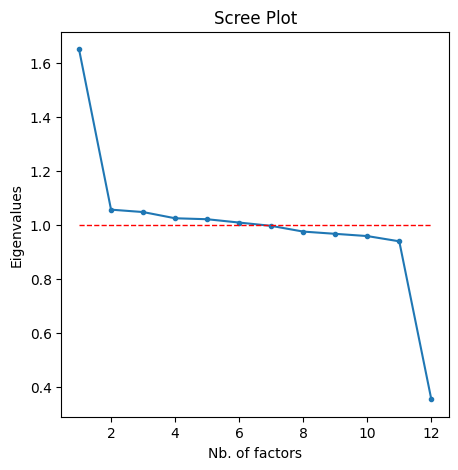

In [61]:
# print scree plot

# first the main plot
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree Plot")

# add Kaiser's threshold line
ax.plot([1,p],[1,1],"r--",linewidth=1)

plt.show()

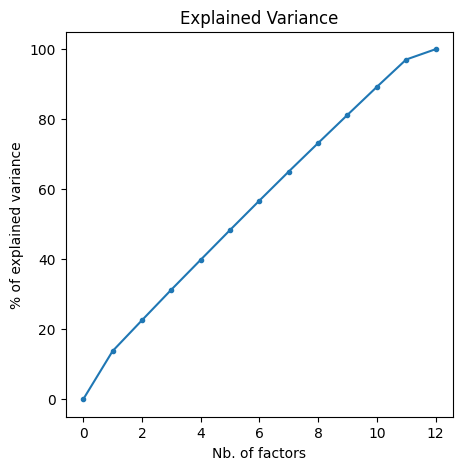

In [62]:
# print explained variance plot

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("% of explained variance")
plt.title("Explained Variance")

plt.show()

In [63]:
# applying Barlett's test of Sphericity
# import statistical package from scipy
import scipy.stats as stats

# Bartlett's statistic
C = -(n-1-(2*p+5)/6) * np.sum(np.log(acp.eig_[0]))
print(f"Barlett's statistics: {C:.3f}")

# degree of freedom
ddl = p*(p-1)/2

# p-value
print(f"p-value: {1-stats.chi2.cdf(C,df=ddl):.3f}")

Barlett's statistics: 138699.504
p-value: 0.000


In [64]:
# computing Karlis-Saporta-Spinaki threshold
# impor math package
import math

# seuil de Karlis-Saporta-Spinaki
kss = 1+2*math.sqrt((p-1)/(n-1))
print(f"Karlis-Saporta-Spinaki threshold: {kss:.3f}")

Karlis-Saporta-Spinaki threshold: 1.013


thresholds for the broken sticks: [3.10321068 2.10321068 1.60321068 1.26987734 1.01987734 0.81987734
 0.65321068 0.51035354 0.38535354 0.27424242 0.17424242 0.08333333]


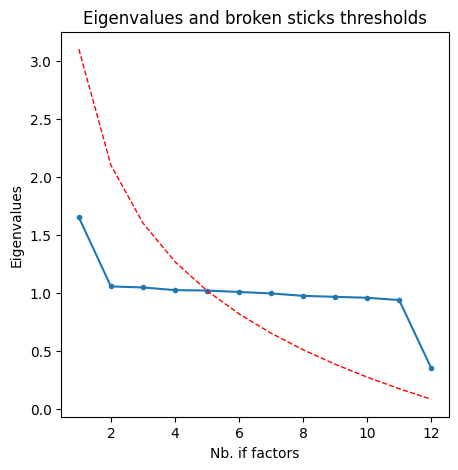

In [65]:
# broken sticks method
# threshold for the broken sticks
b = np.flip(np.cumsum(1/np.arange(p,0,-1)))
print(f"thresholds for the broken sticks: {b}")

# plot eigenvalues
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. if factors")
ax.set_ylabel("Eigenvalues")
plt.title("Eigenvalues and broken sticks thresholds")

# add broken sticks thresholds
ax.plot(range(1,p+1),b,"r--",linewidth=1)

plt.show()

In [66]:
# correlation between variables and factors
print(pd.DataFrame(acp.col_coord_[:,:2],index=df.columns, columns=['F1','F2']))

                           F1        F2
income               0.018539 -0.027993
age                  0.003300  0.158179
experience           0.905199 -0.048790
relationship_status  0.000038 -0.354334
house_ownership     -0.025770 -0.059137
car_ownership        0.029230  0.444715
profession          -0.005946  0.042786
city                -0.075239 -0.403003
state                0.017743  0.558120
current_job_yrs      0.904194 -0.054457
current_house_yrs    0.036254  0.164522
risk_flag           -0.074484 -0.442472


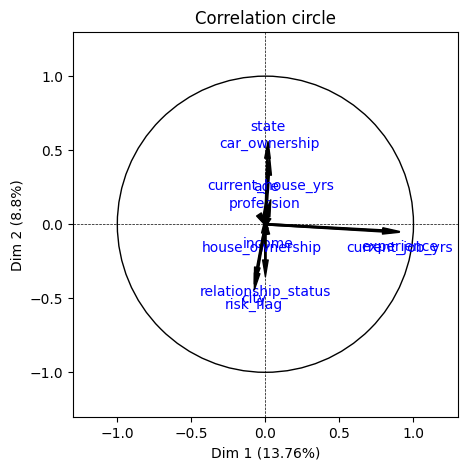

In [67]:
acp.correlation_circle(num_x_axis=1,num_y_axis=2, figsize=(5,5))

In [68]:
print(pd.DataFrame(acp.col_coord_[:,:2],index=df_PCA.columns, columns=['F1','F2']))

                           F1        F2
income               0.018539 -0.027993
age                  0.003300  0.158179
experience           0.905199 -0.048790
relationship_status  0.000038 -0.354334
house_ownership     -0.025770 -0.059137
car_ownership        0.029230  0.444715
profession          -0.005946  0.042786
city                -0.075239 -0.403003
state                0.017743  0.558120
current_job_yrs      0.904194 -0.054457
current_house_yrs    0.036254  0.164522
risk_flag           -0.074484 -0.442472


In [69]:
# contributions of each variable on the factors (in %)
print(pd.DataFrame(acp.col_contrib_[:,:2],index=df.columns, columns=['F1','F2']))

                               F1         F2
income               2.080843e-02   0.074166
age                  6.592398e-04   2.368109
experience           4.960864e+01   0.225304
relationship_status  8.657239e-08  11.883173
house_ownership      4.020715e-02   0.331001
car_ownership        5.172779e-02  18.718408
profession           2.140425e-03   0.173267
city                 3.427340e-01  15.371685
state                1.906026e-02  29.482252
current_job_yrs      4.949856e+01   0.280681
current_house_yrs    7.957666e-02   2.561859
risk_flag            3.358913e-01  18.530096


In [70]:
# individuals factor coordinates on the first plan (of the two first axes)
print(pd.DataFrame(acp.row_coord_[:,:2],index=df.index))

               0         1
Id                        
1      -1.538021 -0.659049
2       0.488411 -0.518236
3      -1.120442  1.487354
4      -1.839701  0.099170
5      -0.737847 -1.468170
...          ...       ...
251996  0.284895  0.342340
251997 -0.160656 -1.059093
251998 -0.223041 -0.216930
251999 -2.479054 -0.431667
252000  1.035110  0.812868

[252000 rows x 2 columns]


In [71]:
# states factor coordinates on the first plan (of the two first axes)
print(pd.DataFrame(acp.row_coord_[:,:2],index=df.index))

               0         1
Id                        
1      -1.538021 -0.659049
2       0.488411 -0.518236
3      -1.120442  1.487354
4      -1.839701  0.099170
5      -0.737847 -1.468170
...          ...       ...
251996  0.284895  0.342340
251997 -0.160656 -1.059093
251998 -0.223041 -0.216930
251999 -2.479054 -0.431667
252000  1.035110  0.812868

[252000 rows x 2 columns]


In [72]:
df_scores = acp.row_topandas()
X_PCA = df_scores.iloc[:, :2]
X_PCA.shape

(252000, 2)

### K means

In [73]:
X_scaled = df.copy()
X_scaled = preprocessor.fit_transform(X_scaled)

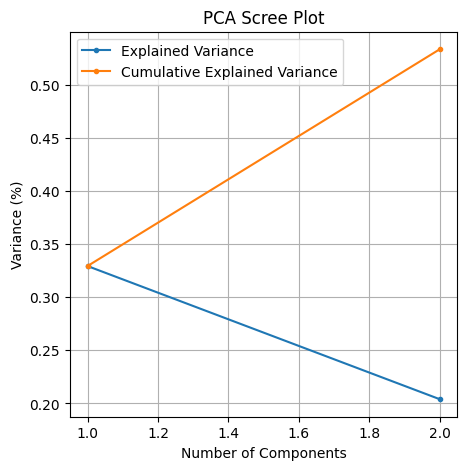

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Scree Plot
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(5, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, ".-", label="Explained Variance")
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), ".-", label="Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.title("PCA Scree Plot")
plt.legend()
plt.grid(True)
plt.show()

In [76]:
kmeans = KMeans(n_clusters=2)  
kmeans_labels = kmeans.fit_predict(pca_result)


In [77]:
kmeans_labels

array([0, 1, 0, ..., 0, 0, 1])

In [78]:
cm_km = confusion_matrix(y, kmeans_labels)
df_cm_km = pd.DataFrame(cm_km, index=["Actual No", "Actual Yes"], columns=["Predicted No", "Predicted Yes"])
print(df_cm_km)

            Predicted No  Predicted Yes
Actual No          99864         121140
Actual Yes         15016          15980


In [79]:
accuracy_score(y, kmeans_labels)

0.4596984126984127

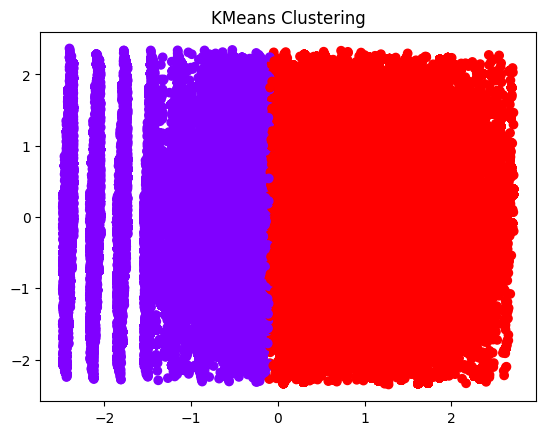

In [80]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title("KMeans Clustering")
plt.show()

### DBSCAN

In [81]:
dbscan = DBSCAN(eps=0.5, min_samples=3)  
dbscan_labels = dbscan.fit_predict(pca_result)

In [82]:
np.unique(dbscan_labels)

array([0], dtype=int64)

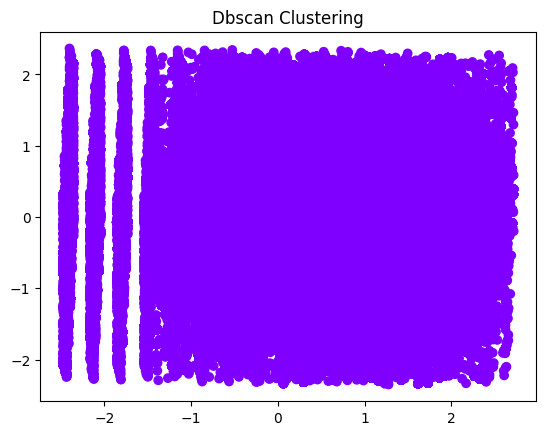

In [83]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title("Dbscan Clustering")
plt.show()

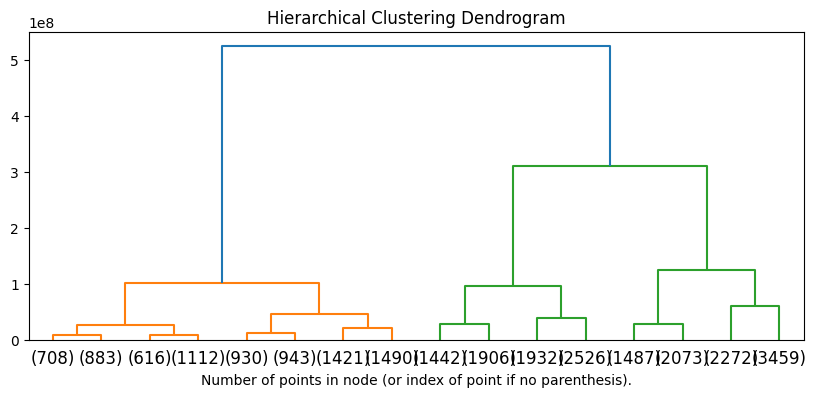

In [84]:
#import numpy as np
#import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

sampled_data = df.sample(frac=0.1)  

# agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0,linkage='ward')  # setting n_clusters=None to get the full tree
agg_cluster.fit(sampled_data)

# plot the dendrogram
def plot_dendrogram(model, **kwargs):
    # create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix

plt.figure(figsize=(10, 4))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
linkage_matrix =plot_dendrogram(agg_cluster, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [85]:
from scipy.cluster.hierarchy import fcluster

cut_at_height = 3e8  
labels = fcluster(linkage_matrix, cut_at_height, criterion='distance')


In [86]:
for cluster in np.unique(labels):
    print(f"Cluster {cluster}:")
    members = np.where(labels == cluster)[0]
    print(members)

Cluster 1:
[   11    13    19 ... 25187 25191 25193]
Cluster 2:
[    4     7     8 ... 25195 25196 25197]
Cluster 3:
[    0     1     2 ... 25192 25198 25199]


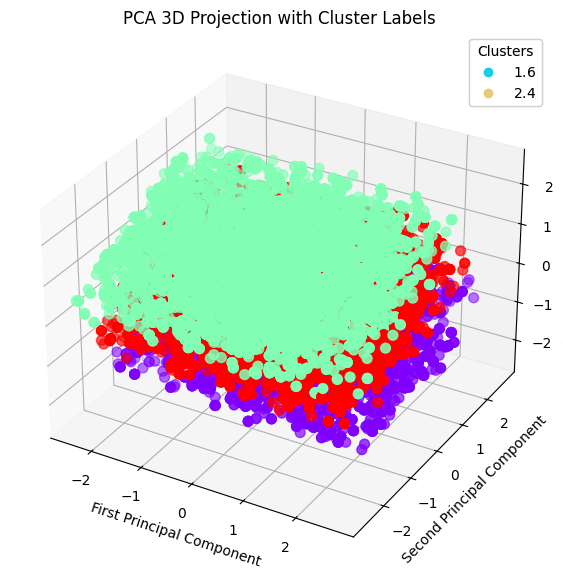

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

X_scaled = sampled_data.copy()
X_scaled = preprocessor.fit_transform(X_scaled)

# adjusting the PCA setup to extract 3 principal components
pca = PCA(n_components=3)
pca_result_3d = pca.fit_transform(X_scaled)

# plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result_3d[:, 0], pca_result_3d[:, 1], pca_result_3d[:, 2], 
            c=labels, cmap='rainbow', s=50)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('PCA 3D Projection with Cluster Labels')

legend1 = ax.legend(*scatter.legend_elements(num=3), loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.show()

In [88]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)

print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.07


In [89]:
clustered_data = sampled_data.copy()
clustered_data['Cluster'] = labels

grouped = clustered_data.groupby('Cluster')
grouped.describe().transpose()

Cluster                     1             2             3
income    count  8.103000e+03  7.806000e+03  9.291000e+03
          mean   8.385131e+06  1.553792e+06  4.920325e+06
          std    9.326442e+05  8.861620e+05  1.081814e+06
          min    6.775535e+06  1.031000e+04  3.090546e+06
          25%    7.566849e+06  7.716312e+05  3.972528e+06
...                       ...           ...           ...
risk_flag min    0.000000e+00  0.000000e+00  0.000000e+00
          25%    0.000000e+00  0.000000e+00  0.000000e+00
          50%    0.000000e+00  0.000000e+00  0.000000e+00
          75%    0.000000e+00  0.000000e+00  0.000000e+00
          max    1.000000e+00  1.000000e+00  1.000000e+00

[96 rows x 3 columns]

In [90]:
sampled_data.head()

,income,age,experience,relationship_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
Id,,,,,,,,,,,,
123678,5572727,74,2,1,2,1,44,10,25,2,13,1
60637,4887997,77,20,1,2,0,22,175,0,10,13,0
175064,4122315,31,14,1,1,1,33,282,6,10,11,0
35101,5013716,29,17,1,2,0,22,183,10,10,11,1
97917,2797997,30,10,1,2,0,33,199,2,8,13,0


In [91]:
overall_mean = sampled_data.mean()
cluster_means = grouped.mean()

comparison = pd.concat([overall_mean, cluster_means.transpose()], axis=1)
print(comparison)

                                0             1             2             3
income               4.991602e+06  8.385131e+06  1.553792e+06  4.920325e+06
age                  4.988032e+01  4.959916e+01  4.983308e+01  5.016521e+01
experience           1.008960e+01  1.010626e+01  1.009236e+01  1.007276e+01
relationship_status  9.005159e-01  9.007775e-01  9.004612e-01  9.003337e-01
house_ownership      1.889325e+00  1.898186e+00  1.875096e+00  1.893553e+00
car_ownership        3.000397e-01  3.027274e-01  2.931079e-01  3.035195e-01
profession           2.514813e+01  2.524250e+01  2.535524e+01  2.489183e+01
city                 1.575205e+02  1.576544e+02  1.557329e+02  1.589056e+02
state                1.372317e+01  1.361261e+01  1.373751e+01  1.380756e+01
current_job_yrs      6.295556e+00  6.333704e+00  6.287215e+00  6.269293e+00
current_house_yrs    1.198349e+01  1.199593e+01  1.196362e+01  1.198934e+01
risk_flag            1.228968e-01  1.224238e-01  1.236229e-01  1.226994e-01


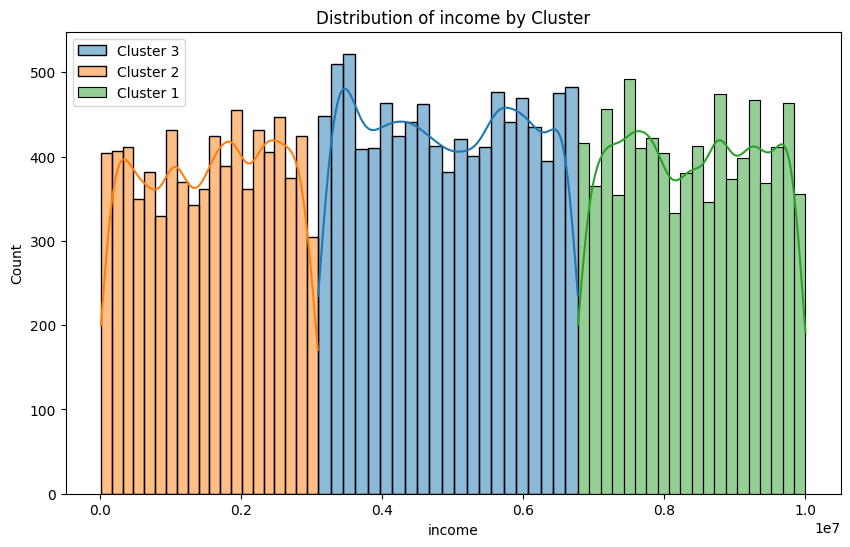

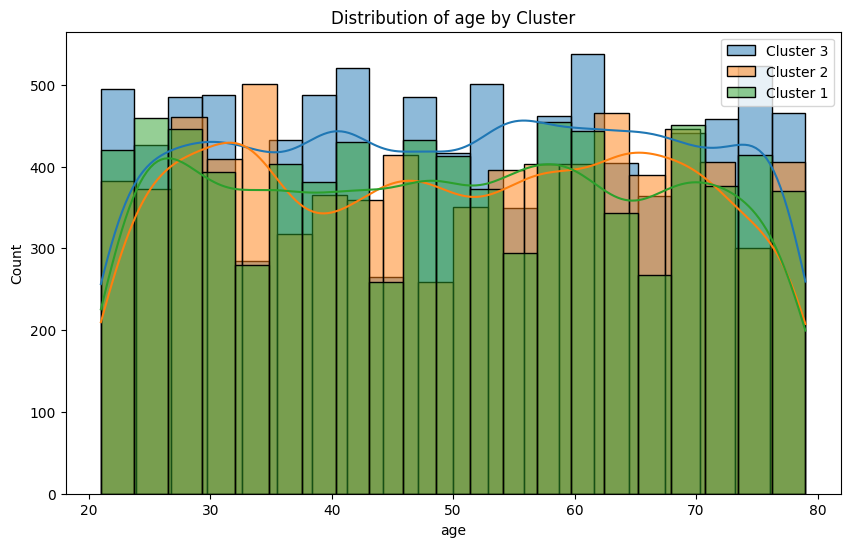

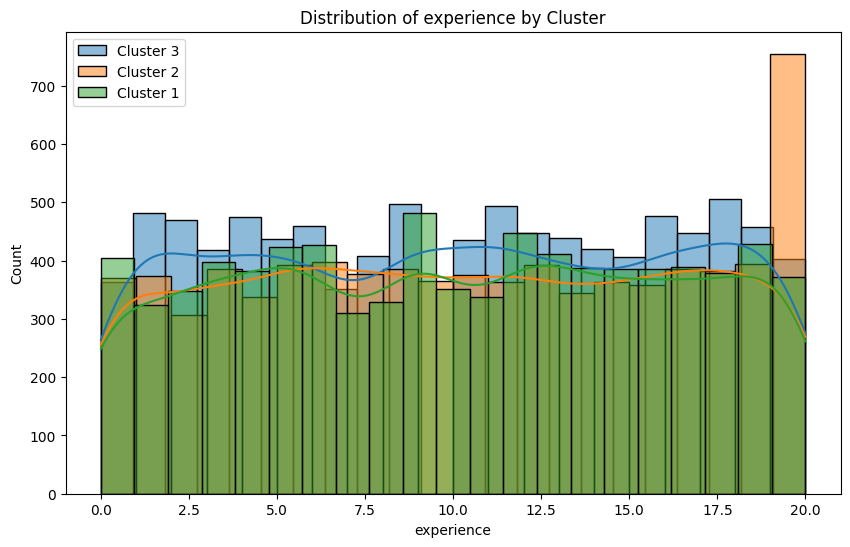

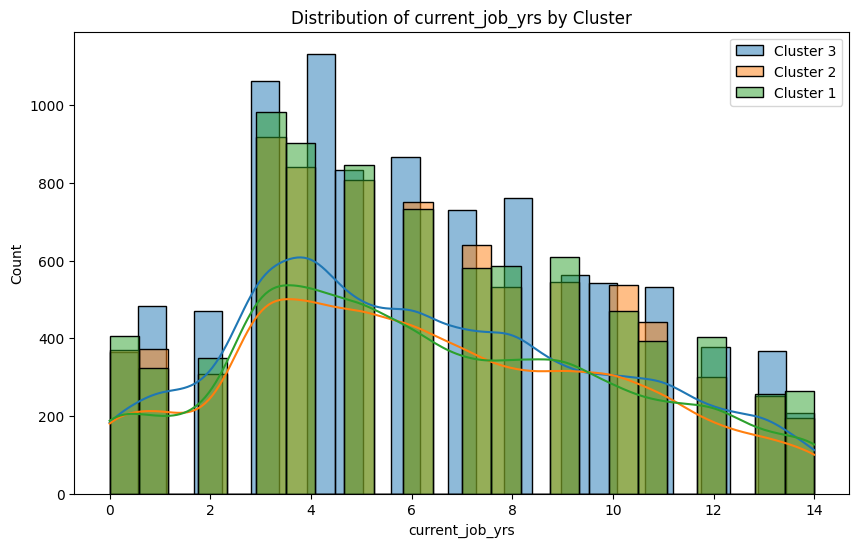

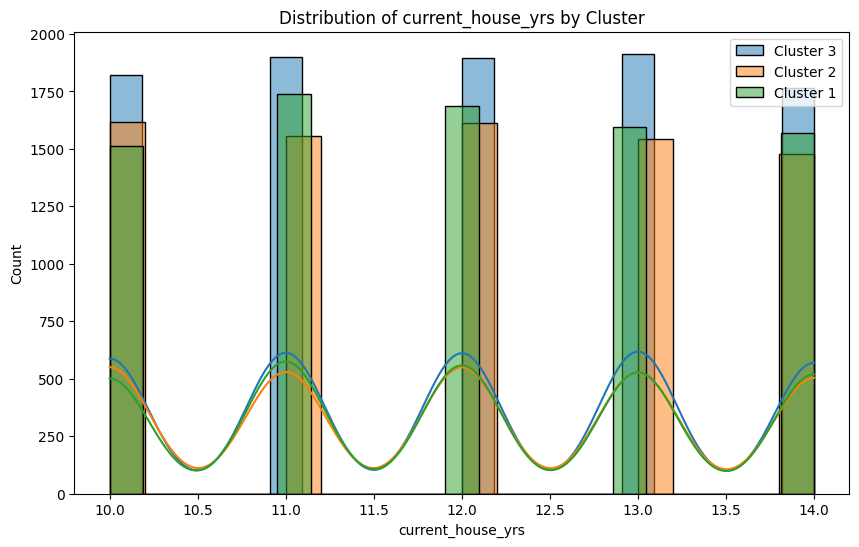

<Axes: xlabel='Cluster'>

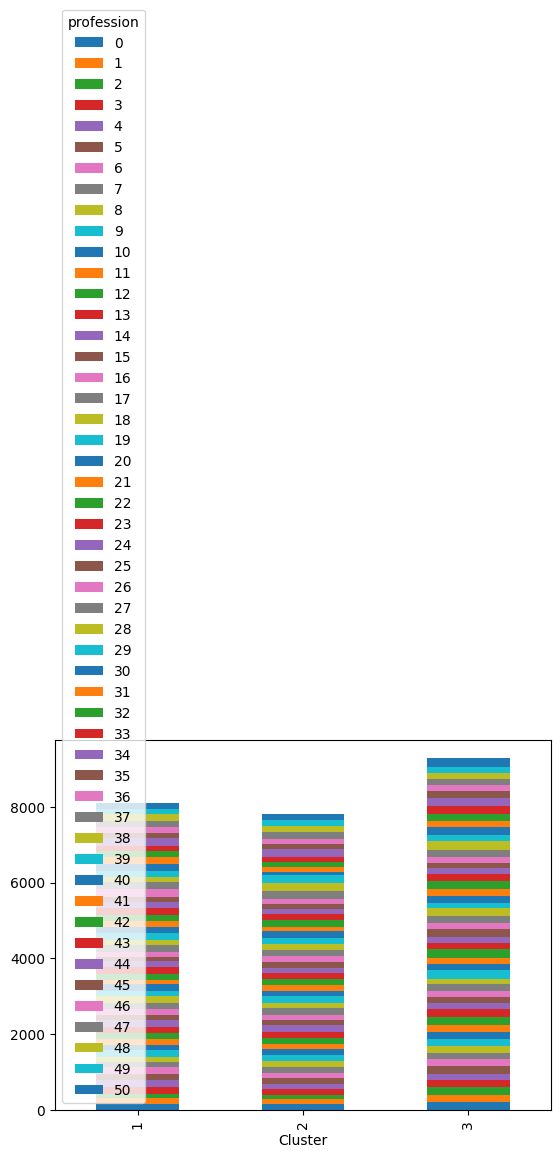

In [92]:
import matplotlib.pyplot as plt

# For numerical attributes
for column in ['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs']:
    plt.figure(figsize=(10,6))
    for cluster in clustered_data['Cluster'].unique():
        sb.histplot(clustered_data[clustered_data['Cluster']==cluster][column], label=f"Cluster {cluster}", kde=True)
    plt.legend()
    plt.title(f'Distribution of {column} by Cluster')
    plt.show()

# For categorical attributes like 'profession'
clustered_data.groupby('Cluster')['profession'].value_counts().unstack().plot(kind='bar', stacked=True)
